Problem Statement:
    
I have to program a Python script to perform sentiment analysis of the Twitter activity of news outlets - BBC, CBS, CNN, Fox, and New York times - and present findings visually.

Observations -

1. It's quite surprising that on 6/27/2018 amongst the 5 news outlets that we tracked the tweets for, Fox has the highest compound score! I was intrigued to run through the tweets from Fox and the tweets contained words with positive tone! Examples -"We believe that families should be together."; "We believe in free speech on college campuses, not censorship.  And rightly so, the graph tweet polarity vs tweets ago have majority of the tweets positively above the neutral zero line. While testing my program a couple of days ago, Fox wasn't rated positive on the plots. The timing coincides with Supreme Court upholding the travel ban (which Fox News may be in favor of)It emphasizes how important timing is to derive observations, and at the same time - how important it is to have historical data and background knowledge to draw conclusions on the observations.


2. Equally surprising is the compound score for NYT which was highest on a negative scale. The same analogy as above applies here as well - the timing coincides with Supreme Court upholding the travel ban (which NYT News has strongly disapproved). Examples -  "My father, Fred Korematsu, would have been upset that the court overturned"; " The House overwhelmingly rejected a major immigration overhaul". However, the neutral zone on tweet polarity vs tweets ago was dominated by NYT - and that aligns to my perception that it's one of the very neutral news medium.


3. I wasn’t too surprised with the sentiment analysis of CNN, CBS, and BBC though. BBC was negatively scored, and CBS and CNN were positively scored.

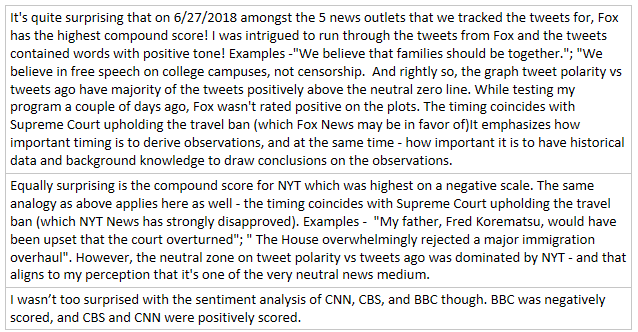

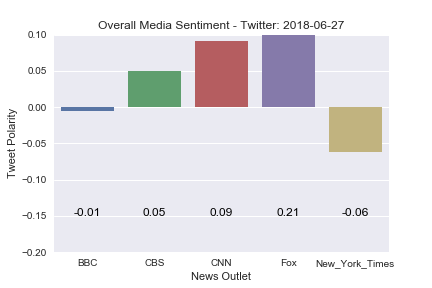
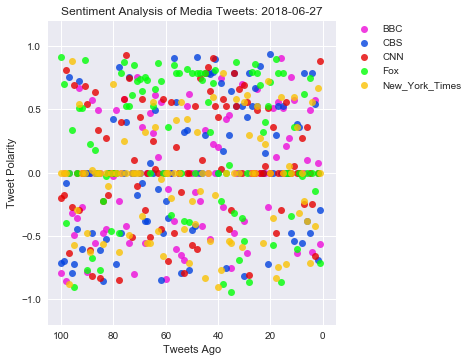

Step 1 : I import the libraries and packages (a.k.a tools of trade!) for my analysis.

In [1]:
# Import dependencies

import tweepy
import json
import numpy as np
import pandas as pd

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns


# Twitter API Keys

consumer_key = "aoCDolf5adnIaw8yzMmxy1EH4"
consumer_secret = "LBmKVfpZoqOT6YVsWcjXa1ZyXjZ2i8hu4LhbnvVOBwwvu6hjF8"
access_token = "161980186-vjLsfGo6lCe92ttUonuaTxUAOsy9J5eDDOjH2sjf"
access_token_secret = "M1XVIyVrdx6nVI8ty59O4zbSEx6mkEX5guhF1yeT9wjl2"

# Import and Initialize Sentiment Analyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Step 2 : I set up tweepy authetication to take my API keys and grant me authorization to use API results.

In [2]:
# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

Step 3: I assign and define variables - hold target accounts, empty list to hold sentiments.

In [3]:
# Define target accounts for BBC, CBS, CNN, Fox, and New York times

target_user = ["BBCWorld","CBSNews","CNN","FoxNews","nytimes"]

In [4]:
# Lists to hold sentiments

sentiments = []

Step 4: I define the logic to retrieve tweets and analyze their sentiments. Also, the first 100 tweets for each target account is printed to the console. 

In [5]:
# Grab 100 tweets for each target user and loop through it 

for target in target_user:
    
    at_target = "@" + target
    public_tweets = api.user_timeline(at_target, count=100, result_type="recent")
    counter = 1
    
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add sentiments for each tweet into a list
        
        sentiments.append({"Date": tweet["created_at"], 
                           "News_Source":target,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets_Ago": counter,
                           "Tweet":tweet["text"]})
        
        
        Tweet_Text = tweet["text"]
        
        # Print Tweet Text and increment the counter 
        
        print(f"Tweet {counter} for {target}: {Tweet_Text} \n")
        
        counter = counter + 1


Tweet 1 for BBCWorld: Is India really the most dangerous country for women? https://t.co/XbSKKQbaO3 

Tweet 2 for BBCWorld: What do European governments want from the EU Summit? https://t.co/4EHTLBtXHm 

Tweet 3 for BBCWorld: World Cup 2018: Mexico fans celebrate South Korean 'brothers' https://t.co/NgkaKULS9w 

Tweet 4 for BBCWorld: Europe's migration crisis: Could it finish the EU? https://t.co/DVhyHlFgCQ 

Tweet 5 for BBCWorld: Revamped drug could save lives of many new mothers - WHO https://t.co/dXPz5nf1pD 

Tweet 6 for BBCWorld: Supreme Court: Why a fight over US abortion law now looms https://t.co/dQIagzjGu1 

Tweet 7 for BBCWorld: Five attempts to make toys more inclusive https://t.co/q0TD2r1nlH 

Tweet 8 for BBCWorld: Asylum seekers in Ireland to be allowed to work https://t.co/733eZAPPjj 

Tweet 9 for BBCWorld: Flamingo that escaped a zoo in 2005 spotted in Texas https://t.co/jHKFQFdCxg 

Tweet 10 for BBCWorld: Antwon Rose: Pittsburgh officer charged with criminal homicide htt

Tweet 1 for CBSNews: At North Dakota stop, President Trump claims his rallies are the reason why NFL ratings are down: "They find this m… https://t.co/D0SIEmWRxp 

Tweet 2 for CBSNews: Pittsburgh officer charged in shooting death of unarmed black teen https://t.co/JiGvVQw3sk https://t.co/nSdFZkyPz2 

Tweet 3 for CBSNews: LIVE: President Trump greets supporters at rally in Fargo, North Dakota https://t.co/ln7yjZwJKQ https://t.co/jz8YqjNBaG 

Tweet 4 for CBSNews: President Trump says he will pick retiring Supreme Court Justice Kennedy's replacement from a list the White House… https://t.co/m3fiLvMyYy 

Tweet 5 for CBSNews: Ten-term Democratic Congressman Joe Crowley was defeated in New York City by newcomer 28-year-old Alexandria Ocasio… https://t.co/UmcOboxwca 

Tweet 6 for CBSNews: The U.S. was just ranked as one of the top 10 most dangerous countries for women for the first time ever:… https://t.co/0VgA8p9SSN 

Tweet 7 for CBSNews: Sen. Schumer says it would be the "height of hypocris

Tweet 1 for CNN: "So many people across the country are inspired by this win and inspired about this race because of what it represe… https://t.co/VwrdWR4YPD 

Tweet 2 for CNN: Money isn't everything in a political race “if you really understand your community," Alexandria Ocasio-Cortez says… https://t.co/aYylUfAQuq 

Tweet 3 for CNN: Senate Democrats are powerless to stop Trump SCOTUS pick https://t.co/wR3A8bDIJj | Analysis by Chris Cillizza https://t.co/XoMCpBzzJa 

Tweet 4 for CNN: Ben Jealous, a former NAACP leader endorsed by Bernie Sanders, moved a step closer to becoming Maryland's first bla… https://t.co/2jUyBLvNIe 

Tweet 5 for CNN: The Netherlands is banning face coverings, including burqas and niqabs, in public spaces such as schools, hospitals… https://t.co/VkwfiLLjXe 

Tweet 6 for CNN: Google's eerily human phone bot is ready for the real world https://t.co/Y5dD19nsZR 

Tweet 7 for CNN: Beer is being rationed in the UK because of a shortage of carbon dioxide https://t.co/K

Tweet 1 for FoxNews: President @realDonaldTrump: "The travel ban ruling underscores just how critical it is to confirm judges who will s… https://t.co/QFsqDLlzVd 

Tweet 2 for FoxNews: President @realDonaldTrump: "A vote for any Democrat in November is a vote for @SenSchumer, @NancyPelosi and… https://t.co/GGTJanlJks 

Tweet 3 for FoxNews: President @realDonaldTrump: "You need a senator who doesn't just talk like they're from North Dakota, but votes lik… https://t.co/4tQNXEc1Mp 

Tweet 4 for FoxNews: President @realDonaldTrump: "ObamaCare is essentially dead." https://t.co/SVlX3KlugG 

Tweet 5 for FoxNews: President @realDonaldTrump on health care: "We are coming out with so many health care plans that are so much bette… https://t.co/OD7MVeoXoU 

Tweet 6 for FoxNews: .@RepKevinCramer: "All I can say is, Mr. President, on behalf of all of the thousands of people in this arena, and… https://t.co/uIogWwz8h0 

Tweet 7 for FoxNews: .@POTUS holds a "Make America Great Again" rally in Fargo, 

Tweet 1 for nytimes: On a big day in the World Cup, here’s a diversion: We removed the ball from photos of group-stage games. See if you… https://t.co/PjBxxz2DxG 

Tweet 2 for nytimes: RT @emilybazelon: Well, here are my thoughts on the retirement of Justice Kennedy.

https://t.co/4vEYBgHMZK 

Tweet 3 for nytimes: A Kansas City immigration lawyer said she broke her foot after being pushed to the ground by an ICE officer. She wa… https://t.co/utMRWvXuEX 

Tweet 4 for nytimes: The front-runners and full list of potential Supreme Court nominees https://t.co/zxRZ41GWLu 

Tweet 5 for nytimes: Terry Crews says he won't be in "The Expendables 4" after a producer tried to get him to drop his sexual assault la… https://t.co/zTlHKBR7KL 

Tweet 6 for nytimes: RT @nytopinion: My father, Fred Korematsu, would have been upset that the court overturned his case only to uphold President Trump’s travel… 

Tweet 7 for nytimes: In 1983, the slashed, scarred body of a 23-year-old black man was discovered 

Step 5: I create dataframes to hold the data extracted from the logic above, and clean the data.

In [6]:
# Convert sentiments to DataFrame

sentiments_pd = pd.DataFrame.from_dict(sentiments)

# Replace the Twitter Handles with identifiable news outlets

sentiments_pd.News_Source = sentiments_pd.News_Source.replace({"BBCWorld":"BBC",
                                                               "CNN": "CNN",
                                                               "FoxNews":"Fox",
                                                               "nytimes" :"New_York_Times",
                                                               "CBSNews":"CBS"})
# Display the 5 outlets to validate

sentiments_pd["News_Source"].value_counts()

CNN               100
Fox               100
CBS               100
BBC               100
New_York_Times    100
Name: News_Source, dtype: int64

In [7]:
# Rearrange the dataframe and define it in a new dataframe

sentiments_pd_clean = sentiments_pd[["News_Source","Tweet","Date","Compound","Positive","Neutral","Negative","Tweets_Ago"]]

sentiments_pd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
News_Source    500 non-null object
Tweet          500 non-null object
Date           500 non-null object
Compound       500 non-null float64
Positive       500 non-null float64
Neutral        500 non-null float64
Negative       500 non-null float64
Tweets_Ago     500 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 31.3+ KB


Step 5: I use seaborn libraries -lmplot, barplot - to visualize the results.

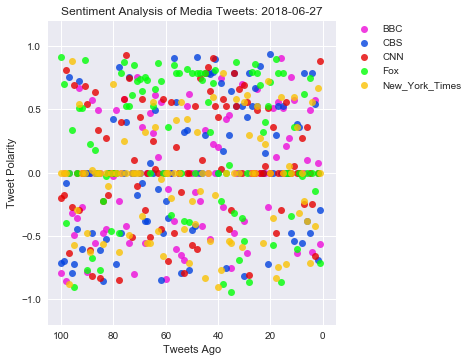

In [8]:
# Define the lmplot structure

sns.set()

sns.set_context("notebook")

    
sns_plot1 = sns.lmplot( x="Tweets_Ago", y="Compound", data = sentiments_pd_clean,fit_reg=False, 
           hue="News_Source", legend=False, palette=dict(CBS="#0343df",Fox="#01ff07",CNN="#e50000",
                                                         BBC="#ed0dd9",New_York_Times="#fac205" ))

Today_Date = str(date.today())


# Label the plot and set the axes limit

Plot_Title = f"Sentiment Analysis of Media Tweets: {Today_Date}"

plt.title(Plot_Title)

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.xlim(105,-5)
plt.ylim(-1.2, 1.2)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Save the image and display

plt.savefig("../Images/TweetPolarity_TweetsAgo.png",bbox_inches="tight")

plt.show(sns_plot1)


In [9]:
# Display the sentiments dataframe grouped by News_Source

sentiments_pd_grouped = sentiments_pd_clean.groupby(["News_Source"],as_index=False).mean()

sentiments_pd_grouped[["News_Source","Compound","Positive","Neutral","Negative"]]

,News_Source,Compound,Positive,Neutral,Negative
0,BBC,-0.005757,0.09058,0.11100,0.79843
1,CBS,0.049551,0.10253,0.08998,0.80750
2,CNN,0.090970,0.10308,0.06798,0.82899
3,Fox,0.211329,0.15845,0.07510,0.76642
4,New_York_Times,-0.061773,0.06710,0.08917,0.84375


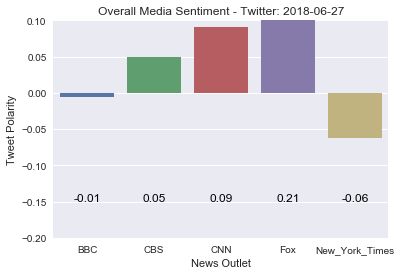

In [10]:
# Define the lmplot structure

sns.set_style("darkgrid")

sns_plot2 = sns.barplot(x="News_Source", y="Compound", data=sentiments_pd_grouped,errwidth=0)

for index, row in sentiments_pd_grouped.iterrows():
    sns_plot2.text(row.name,-0.15, round(row.Compound,2), color='black', ha="center", rotation ='horizontal')

# Label the plot and set axes limit

Plot_Title = f"Overall Media Sentiment - Twitter: {Today_Date}"

plt.title(Plot_Title)

plt.ylim(-0.20, .1)

plt.xlabel("News Outlet")

plt.ylabel("Tweet Polarity")

# Save the image and display

plt.savefig("../Images/TweetPolarity_NewsOutlet.png")

plt.show(sns_plot2)


Step 7: I save the resulting data frame to a CSV.

In [11]:
# Export file as a CSV, without the Pandas index, but with the header

sentiments_pd_clean.to_csv("../Resources/MediaSentiments.csv", index=False, header=True)